In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

In [ ]:
PassengerId = data_test["PassengerId"]

In [ ]:
def data_cleaning(df):
  shit_col = ["Name", "PassengerId", "Ticket", "Cabin"]
  df.drop(shit_col, inplace = True, axis = 1)
  df.fillna(0, inplace = True)


In [ ]:
data_cleaning(data_train)
data_cleaning(data_test)

In [ ]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,0.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data_train = pd.get_dummies(data_train, columns=["Embarked"])
data_train = pd.get_dummies(data_train, columns=["Sex"])
data_train = pd.get_dummies(data_train, columns=["Pclass"])
data_test = pd.get_dummies(data_test, columns=["Embarked"])
data_test = pd.get_dummies(data_test, columns=["Sex"])
data_test = pd.get_dummies(data_test, columns=["Pclass"])

In [ ]:
data_train.drop("Embarked_0", axis = 1, inplace = True)

In [ ]:
cols = ["Sex_male","Sex_female", "Pclass_1", "Pclass_2", "Pclass_3", "Age", "SibSp", "Parch", "Fare", "Embarked_C","Embarked_Q", "Embarked_S"]
target_col = "Survived"

In [ ]:
data_train

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,0.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split(data_train[cols], data_train[target_col], test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X_tr)
X_t = std.transform(X_t)
X_tr = std.transform(X_tr)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {
    'n_neighbors': np.arange(1,11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}
search = GridSearchCV(knnc, grid, cv=5, scoring = 'accuracy', n_jobs = -1)
search.fit(X_tr, y_tr)
search.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
logr = LogisticRegression().fit(X_tr, y_tr)
knnc = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights="uniform").fit(X_tr, y_tr)
tree = DecisionTreeClassifier().fit(X_tr, y_tr)

In [ ]:
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def score(true, pred, pred_proba):
  print("Accuracy score: " + str(metrics.accuracy_score(true, pred)))
  print("Recall score: " + str(metrics.recall_score(true, pred)))
  print("Precision score: " + str(metrics.precision_score(true, pred)))
  fpr, tpr, _ = metrics.roc_curve(true,  pred_proba)
  auc = metrics.roc_auc_score(true, pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
  

Accuracy score: 0.7821229050279329
Recall score: 0.6575342465753424
Precision score: 0.7741935483870968


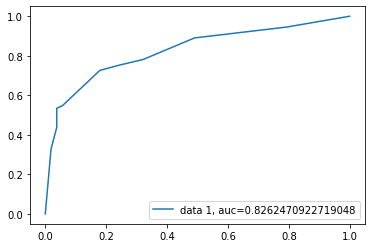

In [ ]:
score(y_t, knnc.predict(X_t), knnc.predict_proba(X_t)[:,1])

Accuracy score: 0.7932960893854749
Recall score: 0.7671232876712328
Precision score: 0.7368421052631579


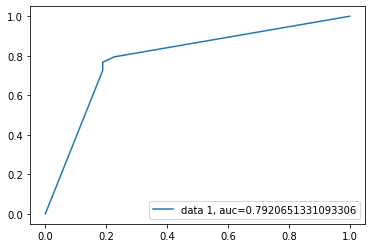

In [ ]:
score(y_t, tree.predict(X_t), tree.predict_proba(X_t)[:,1])

Accuracy score: 0.7877094972067039
Recall score: 0.7123287671232876
Precision score: 0.7536231884057971


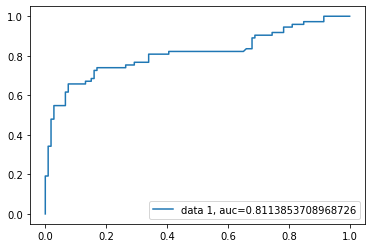

In [ ]:
score(y_t, logr.predict(X_t), logr.predict_proba(X_t)[:,1])

In [ ]:
data_test_x = std.transform(data_test)
prediction = pd.DataFrame([PassengerId,  knnc.predict(data_test_x)]).transpose()
prediction.set_index("PassengerId", inplace = True)
prediction.columns=["Survived"]
prediction.to_csv("Prediction.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
